In [2]:
# install pytorch

# !pip3 install torch torchvision torchaudio

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [4]:
# GPU 사용 가능 여부 확인 -> GPU or CPU 선택

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cpu


In [6]:
# 데이터 준비 1.
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
# 데이터 준비 2.
train_dataset = datasets.MNIST(root="data-files",
                               train=True,
                               download=True,
                               # transform=transforms.ToTensor(),
                               transform=transform)

test_dataset = datasets.MNIST(root="data-files",
                              train=False,
                              download=True,
                              # transform=transforms.ToTensor(),
                              transform=transform)

In [9]:
# 데이터 준비 3.

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=32,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=32,
                                          shuffle=True)

In [10]:
# 데이터 확인

for X, y in train_loader:
    print(X.shape, y.shape)
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])


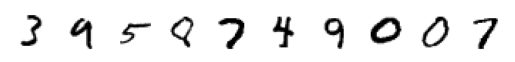

tensor([3, 9, 5, 8, 7, 4, 9, 0, 0, 7])

In [16]:
for idx in range(10):
    plt.subplot(1, 10, idx+1)
    plt.axis('off')
    plt.imshow(X[idx, :, :, :].reshape(28, 28), cmap="gray_r")
plt.show()
y[:10]

In [20]:
# 모델 구조 설계

class MnistNet(nn.Module):
    def __init__(self):
        super(MnistNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [21]:
# 학습 도구 구성
model = MnistNet().to(device)
# loss = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

print(model)

MnistNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [24]:
# 훈련 함수 정의 (학습 설계)
def train(model, train_loader, optimizer):
    model.train() # train mode로 설정
    for idx, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        if idx % 10 == 0:
            print(f"Batch : {idx}, Loss : {loss.item()}")

In [ ]:
def evaluate(model, test_loader):
    pass

In [25]:
# 학습 실행

for epoch in range(10):
    train(model, train_loader, optimizer)
    print(f"Epoch : {epoch}")

Batch : 0, Loss : 0.023862840607762337
Batch : 10, Loss : 0.19117696583271027
Batch : 20, Loss : 0.034987978637218475
Batch : 30, Loss : 0.07653670758008957
Batch : 40, Loss : 0.4021526873111725
Batch : 50, Loss : 0.40861591696739197
Batch : 60, Loss : 0.30312255024909973
Batch : 70, Loss : 0.1439719945192337
Batch : 80, Loss : 0.12927207350730896
Batch : 90, Loss : 0.14491209387779236
Batch : 100, Loss : 0.3266696631908417
Batch : 110, Loss : 0.20408141613006592
Batch : 120, Loss : 0.2828937768936157
Batch : 130, Loss : 0.10321324318647385
Batch : 140, Loss : 0.15323573350906372
Batch : 150, Loss : 0.05817883834242821
Batch : 160, Loss : 0.07874441146850586
Batch : 170, Loss : 0.2106320858001709
Batch : 180, Loss : 0.11639577895402908
Batch : 190, Loss : 0.3181000053882599
Batch : 200, Loss : 0.2742227017879486
Batch : 210, Loss : 0.03657285496592522
Batch : 220, Loss : 0.0667264387011528
Batch : 230, Loss : 0.027580181136727333
Batch : 240, Loss : 0.24990026652812958
Batch : 250, Los